Dariel Seydulov 62642 bachelor
Kosta Dimitrov 62638 bachelor

Project type A


Project Name: Black Friday Price Predictions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import svm

In [79]:
#read the train data
df=pd.read_csv("./data/train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


__В началото можем да видим какво е съотношението мъже:жени__

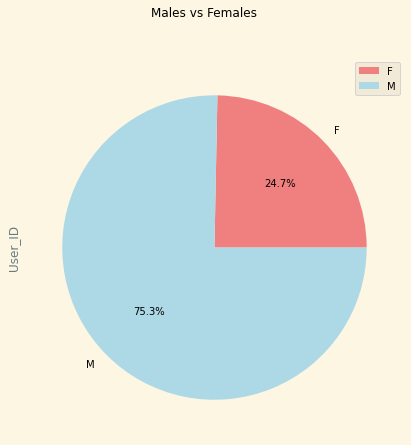

In [7]:
gender_count = df[['Gender', 'User_ID']].groupby('Gender').count()

custom_colors = ['lightcoral', 'lightblue']

plt.style.use('Solarize_Light2')
gender_count.plot(kind='pie', autopct='%1.1f%%', subplots=True, title='Males vs Females', figsize=(12, 7),
                  colors=custom_colors)

plt.show()

Text(0.5, 1.0, 'Gender per transaction')

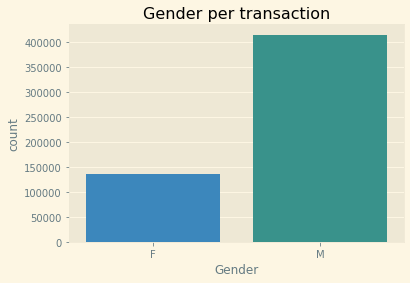

In [8]:
sns.countplot(x=df.Gender)
plt.title('Gender per transaction')

__Изненадващо или не мъжете в dataset-а са три пъти повече от жените.__

array([<AxesSubplot:ylabel='User_ID'>], dtype=object)

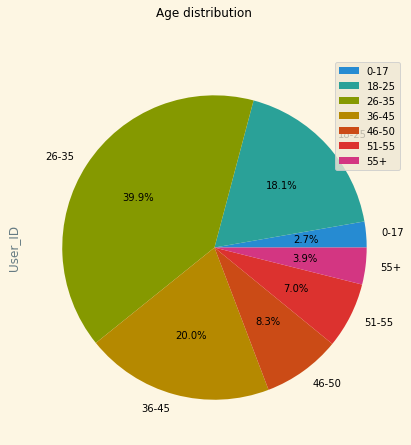

In [9]:
gender_count=df[['Age','User_ID']].groupby('Age').count()
gender_count
plt.style.use('Solarize_Light2')
gender_count.plot(kind='pie',autopct='%1.1f%%',subplots=True,title='Age distribution',figsize=(12,7))

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

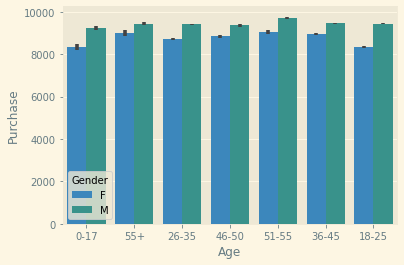

In [10]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

__Тази графика показва разпределението по възрасти като около 80% от хората са между 18 и 45 години.__

In [11]:
#Drop unnecessary column
df.drop(['User_ID'],axis=1,inplace=True)

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


__Тук слагаме числова стойност вместо стринг за пола на потребителя, като за жени стойността е 0, а за мъже 1__

In [13]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,P00375436,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,P00375436,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,0,55+,1,C,2,0,20,NaN,NaN,365


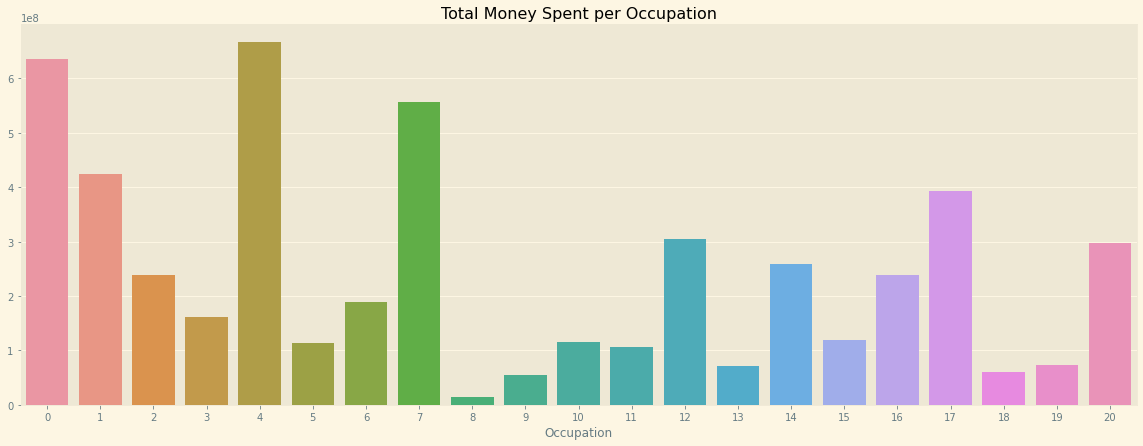

In [14]:
spent_by_occ = df.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(20, 7))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

In [15]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:

label_encoder = preprocessing.LabelEncoder()

df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [17]:

df = pd.concat([df, pd.get_dummies(df['City_Category'], prefix='City')], axis=1)

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,1,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,1,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,1,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,0,0,1


In [18]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370,1,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422,1,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057,1,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969,0,0,1


In [19]:
#Check for missing values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
City_A                             0
City_B                             0
City_C                             0
dtype: int64

__В колоните Product_Category_2 и Product_Category_3 имаме празни стойности, които ще трябва да запълним по най-подходящия начин. Имаме три варианта да заменим липсващите стойности с модата, медианата или средно аритметичното. Останалите колони нямат липсващи стойности, затова няма нужда да ги обработваме допълнително.__

In [20]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df['Product_Category_2'].describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [22]:
df['Product_Category_2'].mode()

0    8.0
dtype: float64

In [23]:
category_2_mode=df['Product_Category_2'].mode()[0]
df['Product_Category_2']=df['Product_Category_2'].fillna(category_2_mode)

df['Product_Category_2'].isnull().sum()

0

In [24]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [25]:
df['Product_Category_3'].describe()

count    166821.000000
mean         12.668243
std           4.125338
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [26]:
category_3_mode=df['Product_Category_3'].mode()[0]
df['Product_Category_3']=df['Product_Category_3'].fillna(category_3_mode)

df['Product_Category_3'].isnull().sum()

0

In [27]:
df['Purchase'].isnull().sum()

0

In [28]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
City_A                        0
City_B                        0
City_C                        0
dtype: int64

__Вече данните ни са напълно изчистени и нямаме липсващи стойности в никоя от колоните.__

In [29]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [30]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  City_A                      550068 non-null  uint8  
 11  City_B                      550068 non-null  uint8  
 12  City_C                      550068 non-null  uint8  
dtypes: float64(2),

In [32]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  City_A                      550068 non-null  uint8  
 11  City_B                      550068 non-null  uint8  
 12  City_C                      550068 non-null  uint8  
dtypes: float64(2),

Purchase by Age Group

<AxesSubplot:title={'center':'Purchase by Age Group'}, ylabel='Age'>

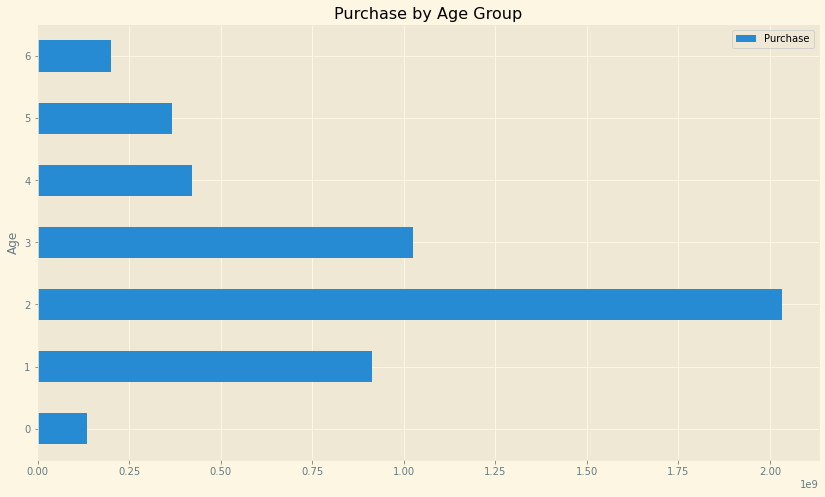

In [33]:
age_pu=df[['Age','Purchase']].groupby('Age').sum()
age_pu.plot(kind='barh',title='Purchase by Age Group', figsize=(14, 8))

Product category by Purchase


<AxesSubplot:title={'center':'Product Category 1 by purchases'}, ylabel='Product_Category_1'>

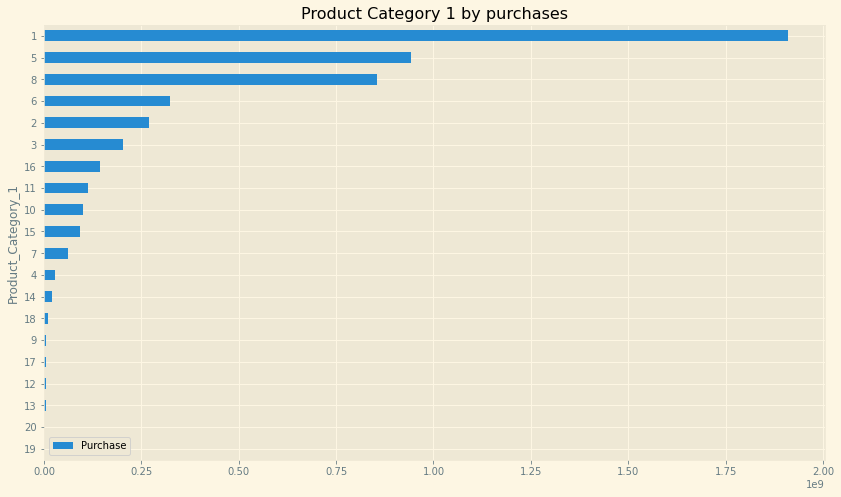

In [34]:
prod_plot1=df[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum()
prod_plot1=prod_plot1.sort_values(by='Purchase')
prod_plot1.plot(kind='barh',title='Product Category 1 by purchases', figsize=(14, 8))

<AxesSubplot:title={'center':'Product Category 2 by purchases'}, ylabel='Product_Category_2'>

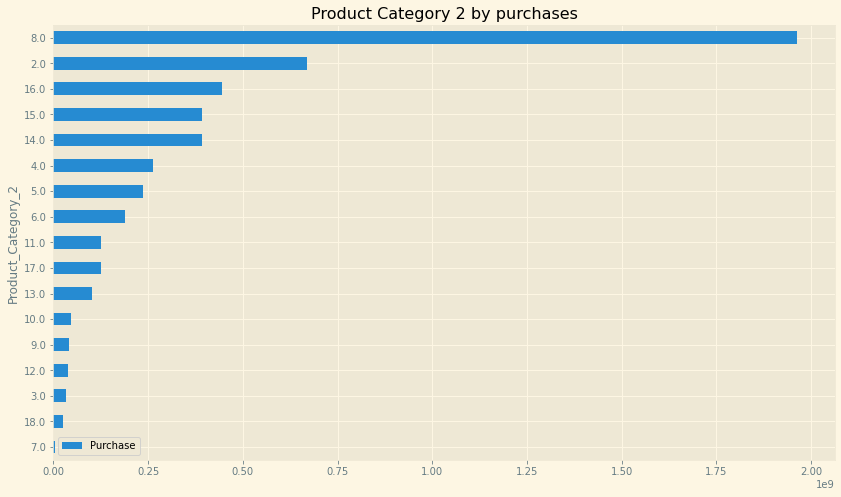

In [35]:
prod_plot2=df[['Product_Category_2','Purchase']].groupby('Product_Category_2').sum()
prod_plot2=prod_plot2.sort_values(by='Purchase')
prod_plot2.plot(kind='barh',title='Product Category 2 by purchases', figsize=(14, 8))

<AxesSubplot:title={'center':'Product Category 3 by purchases'}, ylabel='Product_Category_3'>

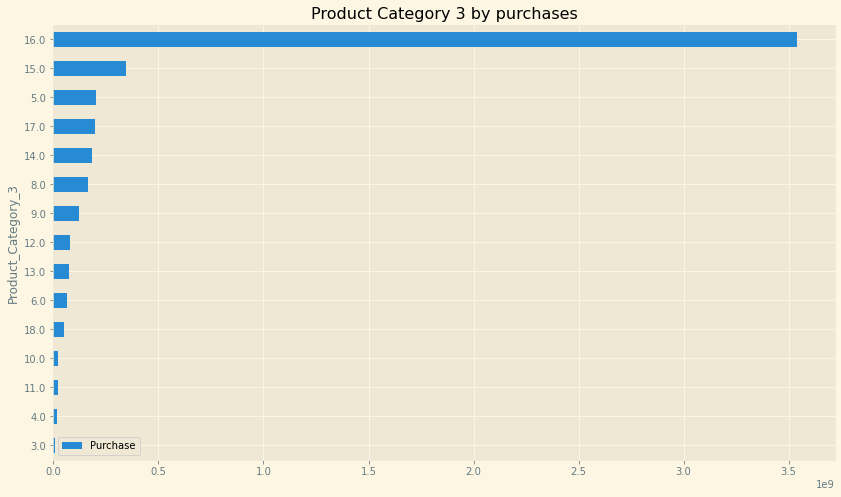

In [36]:
prod_plot3=df[['Product_Category_3','Purchase']].groupby('Product_Category_3').sum()
prod_plot3=prod_plot3.sort_values(by='Purchase')
prod_plot3.plot(kind='barh',title='Product Category 3 by purchases', figsize=(14, 8))

In [37]:
df.drop('Product_ID',axis=1,inplace=True)
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,0,0,10,2,0,3,8.0,16.0,8370,1,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,0,0,10,2,0,12,8.0,16.0,1422,1,0,0
3,0,0,10,2,0,12,14.0,16.0,1057,1,0,0
4,1,6,16,4,0,8,8.0,16.0,7969,0,0,1


<AxesSubplot:ylabel='Frequency'>

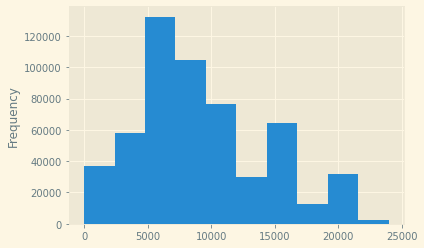

In [38]:
df['Purchase'].plot.hist()

In [39]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [40]:
X=df.drop(['Purchase'],axis=1)
Y=df['Purchase']

In [41]:
X.shape

(550068, 11)

In [42]:
Y.shape

(550068,)

Our target column will be purchase. We will use linear regression and will test with different types of regularisations, SVM and Neural Network. We will visualise the results.

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.3, random_state=42)  

Linear Regression

In [44]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
linear_reg_preds = linear_reg.predict(X_test)

print("Linear Regression:")
print("MAE: ",mean_absolute_error(Y_test, linear_reg_preds))
print("R-squared:", r2_score(Y_test, linear_reg_preds))

Linear Regression:
MAE:  3577.528436816375
R-squared: 0.12927849643166023


In [45]:
print("MAE: ",mean_absolute_error(Y_test, linear_reg_preds))
print("R-squared:", r2_score(Y_test, linear_reg_preds))

MAE:  3577.528436816375
R-squared: 0.12927849643166023


Ridge Regression

In [46]:

ridge_reg = Ridge()
ridge_reg.fit(X_train, Y_train)
ridge_reg_preds = ridge_reg.predict(X_test)

print("\nRidge Regression:")
print("Mean Squared Error:", mean_squared_error(Y_test, ridge_reg_preds))
print("MAE: ",mean_absolute_error(Y_test, ridge_reg_preds))
print("R-squared:", r2_score(Y_test, ridge_reg_preds))


Ridge Regression:
Mean Squared Error: 21944298.856267836
MAE:  3577.4327110220825
R-squared: 0.12927310384244806


Lasso Regression

In [47]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, Y_train)
lasso_reg_preds = lasso_reg.predict(X_test)

print("\nLasso Regression:")
print("Mean Squared Error:", mean_squared_error(Y_test, lasso_reg_preds))
print("MAE: ",mean_absolute_error(Y_test, lasso_reg_preds))
print("R-squared:", r2_score(Y_test, lasso_reg_preds))


Lasso Regression:
Mean Squared Error: 21944366.776373096
MAE:  3577.3514595188135
R-squared: 0.12927040884349517


Decision Tree

In [48]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
decision_tree_preds = decision_tree.predict(X_test)

print("\nDecision Tree:")
print("Mean Squared Error:", mean_squared_error(Y_test, decision_tree_preds))
print("R-squared:", r2_score(Y_test, decision_tree_preds))


Decision Tree:
Mean Squared Error: 11093624.303817222
R-squared: 0.559816555522267


XGBoost

In [50]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(
    #default 100
    n_estimators = 100
)
xgboost.fit(X_train, Y_train)
xgboost_preds = xgboost.predict(X_test)
predicts_test = xgboost.predict(X_train)
    
print("\nXGBoost:")
print("Mean Squared Error:", mean_squared_error(Y_test, xgboost_preds))
print("R-squared:", r2_score(Y_test, xgboost_preds))
print("Mean Squared Error:", mean_squared_error(Y_train, predicts_test))
print("R-squared:", r2_score(Y_train, predicts_test))


XGBoost:
Mean Squared Error: 8391745.157036383
R-squared: 0.6670243026769378
Mean Squared Error: 8085287.491096142
R-squared: 0.6797080399005226


In [51]:
print("MAE: ", mean_absolute_error(Y_train, predicts_test))

MAE:  2130.5215095750264


In [86]:
from sklearn.preprocessing import LabelEncoder

#read the train data
df=pd.read_csv("./data/train.csv")

columns_to_encode = ['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    # Fit and transform the column
    df[column] = label_encoder.fit_transform(df[column])

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,2734,1,6,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,5883,3567,1,5,13,1,1,1,20,NaN,NaN,368
550064,5885,3568,0,2,1,2,3,0,20,NaN,NaN,371
550065,5886,3568,0,2,15,1,4,1,20,NaN,NaN,137
550066,5888,3568,0,6,1,2,2,0,20,NaN,NaN,365


In [121]:
df_copy = df.copy()

s1 = set(df_copy[df_copy['Product_Category_1'] == 1]['Product_ID'].unique())
s2 = set(df_copy[df_copy['Product_Category_1'] != 1]['Product_ID'].unique())

len(s1), len(s2), len(df_copy['Product_ID'].unique())

(493, 3138, 3631)

In [120]:
df_copy

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,2734,1,6,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,5883,3567,1,5,13,1,1,1,20,NaN,NaN,368
550064,5885,3568,0,2,1,2,3,0,20,NaN,NaN,371
550065,5886,3568,0,2,15,1,4,1,20,NaN,NaN,137
550066,5888,3568,0,6,1,2,2,0,20,NaN,NaN,365


In [112]:
df_copy = df.copy()

# df_copy = df_copy[df_copy['Product_Category_1'] != 1]

print(len(df_copy), len(df))

# df_copy['Product_Category_1'] = np.nan #df_copy['Product_Category_1'].replace(1, np.nan)
# df_copy['Product_Category_2'] = df_copy['Product_Category_2'].replace(2, np.nan)

# df_copy = df_copy.drop(['Product_ID'], axis=1)

df_copy = df_copy[['Product_Category_1', 'Purchase']]

X=df_copy.drop(['Purchase'],axis=1)
Y=df_copy['Purchase']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.3, random_state=42) 

from xgboost import XGBRegressor

xgboost = XGBRegressor(
    #default 100
    n_estimators = 500,
    max_depth = 8,
)
xgboost.fit(X_train, Y_train)
xgboost_preds_train = xgboost.predict(X_train)
xgboost_preds_test = xgboost.predict(X_test)
    
print("\nXGBoost:")
print("MAE train: ",mean_absolute_error(Y_train, xgboost_preds_train))
print("MAE test: ",mean_absolute_error(Y_test, xgboost_preds_test))
print("R-squared train:", r2_score(Y_train, xgboost_preds_train))
print("R-squared test:", r2_score(Y_test, xgboost_preds_test))
# print("Mean Squared Error:", mean_squared_error(Y_10_test, xgboost_preds))
# print("R-squared:", r2_score(Y_10_test, xgboost_preds))
# print("Mean Squared Error:", mean_squared_error(Y_10_train, predicts_test))
# print("R-squared:", r2_score(Y_10_train, predicts_test))

550068 550068

XGBoost:
MAE train:  2293.8595368673614
MAE test:  2306.6252350945165
R-squared train: 0.6383257531950459
R-squared test: 0.6323909855881951


In [111]:
# Get feature importance scores
importance_scores = xgboost.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_scores})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)


                       Feature  Importance
8           Product_Category_1    0.837300
1                   Product_ID    0.029097
9           Product_Category_2    0.025149
5                City_Category    0.021476
10          Product_Category_3    0.020676
0                      User_ID    0.012430
2                       Gender    0.011603
3                          Age    0.011262
6   Stay_In_Current_City_Years    0.011008
4                   Occupation    0.010061
7               Marital_Status    0.009939


In [108]:
df_copy = df.copy()

print(len(df_copy), len(df))

X=df_copy.drop(['Purchase'],axis=1)
Y=df_copy['Purchase']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.3, random_state=42) 

from lightgbm import LGBMRegressor

model = LGBMRegressor(
    #default 100
    n_estimators = 500,
    max_depth = 8,
)
xgboost.fit(X_train, Y_train)
xgboost_preds_train = xgboost.predict(X_train)
xgboost_preds_test = xgboost.predict(X_test)

print("\nXGBoost:")
print("MAE train: ",mean_absolute_error(Y_train, xgboost_preds_train))
print("MAE test: ",mean_absolute_error(Y_test, xgboost_preds_test))
print("R-squared train:", r2_score(Y_train, xgboost_preds_train))
print("R-squared test:", r2_score(Y_test, xgboost_preds_test))

550068 550068

XGBoost:
MAE train:  1720.8890495973399
MAE test:  1862.6667932746307
R-squared train: 0.7879508762708326
R-squared test: 0.7484538729901795


In [109]:
def ensemble(models, X_train, X_test, Y_train, Y_test):
    preds_test = []
    preds_train = []
    for model in models:
        model.fit(X_train, Y_train)
        preds_train.append(model.predict(X_train))
        preds_test.append(model.predict(X_test))
        
    preds_train_final = np.mean(preds_train, axis=0)
    preds_test_final = np.mean(preds_test, axis=0)
    print("MAE train: ",mean_absolute_error(Y_train, preds_train_final))
    print("MAE test: ",mean_absolute_error(Y_test, preds_test_final))
    print("R-squared train:", r2_score(Y_train, preds_train_final))
    print("R-squared test:", r2_score(Y_test, preds_test_final))
    return preds_test_final

X=df_copy.drop(['Purchase'],axis=1)
Y=df_copy['Purchase']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.3, random_state=42) 

ensemble(
    [
        XGBRegressor(
            n_estimators = 500,
            max_depth = 8,
        ), 
        LGBMRegressor(
            n_estimators = 500,
            max_depth = 8,
        )
    ], X_train, X_test, Y_train, Y_test
)

MAE train:  1673.776722211684
MAE test:  1884.740430661835
R-squared train: 0.8028549727827322
R-squared test: 0.7440538699602581


array([13675.80535064, 15735.30197102,  8453.638304  , ...,
       16178.53013617, 12603.39604545,  6595.21196767])

In [77]:
pd.concat([X_test, Y_test], axis=1).reset_index(drop=True)
df_pred = pd.concat([pd.concat([X_test, Y_test], axis=1).reset_index(drop=True), pd.Series(xgboost_preds_test)], axis=1)
df_pred = df_pred.rename({0:'Prediction'}, axis = 1)

df_mistake = df_pred[np.abs(df_pred['Purchase']-df_pred['Prediction']) > 7500]
df_mistake

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_A,City_B,City_C,Purchase,Prediction
7,1,1,4,2,0,NaN,8.0,16.0,1,0,0,19347,8125.462402
12,1,2,0,0,0,NaN,16.0,16.0,1,0,0,1762,9538.289062
16,0,2,4,1,1,NaN,6.0,16.0,1,0,0,18952,9943.591797
17,1,2,16,3,1,NaN,15.0,16.0,0,0,1,3044,10623.908203
19,1,1,18,0,0,NaN,5.0,15.0,0,1,0,1462,10267.728516
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164971,1,1,6,1,0,NaN,13.0,16.0,0,1,0,23923,9698.051758
164973,1,1,7,1,0,NaN,16.0,16.0,1,0,0,20671,10685.500000
164987,1,2,7,1,0,NaN,8.0,16.0,1,0,0,20809,7956.776855
165002,1,2,4,2,0,NaN,15.0,16.0,0,1,0,19689,10753.609375


In [62]:
df_mistake = df_pred[np.abs(df_pred['Purchase']-df_pred['Prediction']) > 7500]

for col in df.columns:
    if col == 'Purchase':
        continue
    print(f"---------------------{col}---------------------")
    print(df[col].value_counts() / len(df))
    print(df_mistake[col].value_counts() / len(df_mistake))
# df_mistake

---------------------Gender---------------------
1    0.753105
0    0.246895
Name: Gender, dtype: float64
1    0.795699
0    0.204301
Name: Gender, dtype: float64
---------------------Age---------------------
2    0.399200
3    0.199999
1    0.181178
4    0.083082
5    0.069993
6    0.039093
0    0.027455
Name: Age, dtype: float64
2    0.448304
1    0.220568
3    0.172870
4    0.049076
5    0.048801
0    0.031982
6    0.028398
Name: Age, dtype: float64
---------------------Occupation---------------------
4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64
4     0.168459
0     0.138131
7     0.096498
1     0.089881
17    0.065343
20    0.055693
12    0.053763
14    0.053212
2     0.051558
16    0

<AxesSubplot:ylabel='Frequency'>

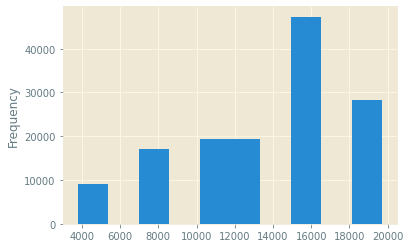

In [ ]:
df[df['Product_Category_1'] == 1]['Purchase'].plot.hist()

In [ ]:
np.hstack((predicts_test, Y_train))

array([ 7687.35205078, 14111.91308594,  7266.90478516, ...,
        6954.        ,  6151.        ,  7146.        ])

In [ ]:
df_14000 = df[df['Purchase'] < 14000]

<AxesSubplot:ylabel='Frequency'>

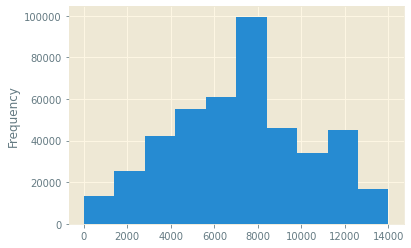

In [ ]:
df_14000['Purchase'].plot.hist()

In [ ]:
X=df_14000.drop(['Purchase'],axis=1)
Y=df_14000['Purchase']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.3, random_state=42)  

xgboost = XGBRegressor(
    # 1k durveta default 100
    n_estimators = 200
)
xgboost.fit(X_train, Y_train)
xgboost_preds = xgboost.predict(X_test)
predicts_test = xgboost.predict(X_train)
    
print("\nXGBoost:")
print("Mean Squared Error:", mean_squared_error(Y_test, xgboost_preds))
print("R-squared:", r2_score(Y_test, xgboost_preds))
print("Mean Squared Error:", mean_squared_error(Y_train, predicts_test))
print("R-squared:", r2_score(Y_train, predicts_test))


XGBoost:
Mean Squared Error: 4365507.002641636
R-squared: 0.5415335946016109
Mean Squared Error: 4147520.782194382
R-squared: 0.5654765567195623


In [ ]:
print("MAE: ",mean_absolute_error(Y_train, predicts_test))

MAE:  1617.620178506286


SVM

In [ ]:
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score

# svm_classifier = SVC()

# param_grid_3 = {
#     'C': [1, 10, 100],
#     'gamma': [0.1, 1, 10]
# }

# scorer_3 = make_scorer(f1_score)

# cv_3 = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# grid_search_3 = GridSearchCV(svm_classifier, param_grid_3, scoring=scorer_3, cv=cv_3)

# grid_search_3.fit(X_train, Y_train)

# print("Най-добри хиперпараметри:", grid_search_3.best_params_)
# print("Най-добри оценки:", grid_search_3.best_score_)

In [ ]:
# svr_model = svm.SVR()
# svr_model.fit(X_train, Y_train)

# predictions = svr_model.predict(X_test)

# mse = mean_squared_error(Y_test, predictions)
# print(f'Mean Squared Error: {mse}')